In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("C:\\Users\\eduar\\OneDrive\\Documentos\\Maven Analytics\\Python Project\\Airbnb Paris Analysis\\Dataset\\Listings.csv",encoding="ISO-8859-1",low_memory=False)

In [14]:
data.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [15]:
data.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [17]:
# changing host_since Dtype to Date type

data["host_since"] = pd.to_datetime(data["host_since"]) 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [18]:
# Filter data to Paris and keep only the columns host_since, neighbourhood, city, accommodates and price

paris_listings = (
    data
    .query ("city == 'Paris'")
    .loc [:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [19]:
# Checking for missing values 

paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [20]:
# Analyse numeric columns

paris_listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [21]:
paris_listings.query("accommodates == 0 and price == 0").count() 
# the total missing values are less than 1% so I decide to keep them in the dataset

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [22]:
# Create a table that groups Paris listings by neighbourhood and sorting by mean price (low to high)

paris_listings_neighbourhood = (
    paris_listings
    .groupby ("neighbourhood")
    .agg ({"price" : "mean"})
    .sort_values ("price")
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [23]:
# Create a table for the most expensive neighbourhood grouped by accommodations, sorted by the mean price (low to high)

paris_listings_accommodates = (
    paris_listings
    .query ("neighbourhood == 'Elysee'")
    .groupby ("accommodates")
    .agg ({"price" : "mean"})
    .sort_values ("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [24]:
# Create a table for over_time grouped by host_since year and calculate the average price and count the rows representing the number of new hosts

paris_listings_over_time = (
    paris_listings
    .set_index ("host_since")
    .resample ("Y")
    .agg ({
        "neighbourhood" : "count",
        "price" : "mean"
    })
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


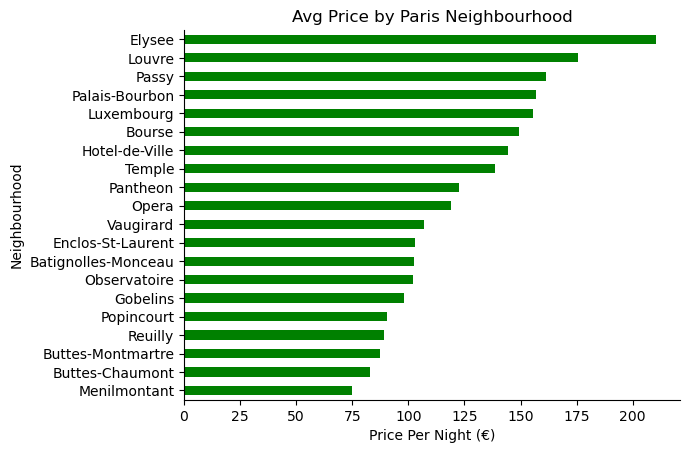

In [27]:
paris_listings_neighbourhood.plot(
    kind = "barh",
    color = "green",
    legend = None
)
sns.despine()
plt.xlabel("Price Per Night (€)")
plt.ylabel("Neighbourhood")
plt.title("Avg Price by Paris Neighbourhood")
plt.show()

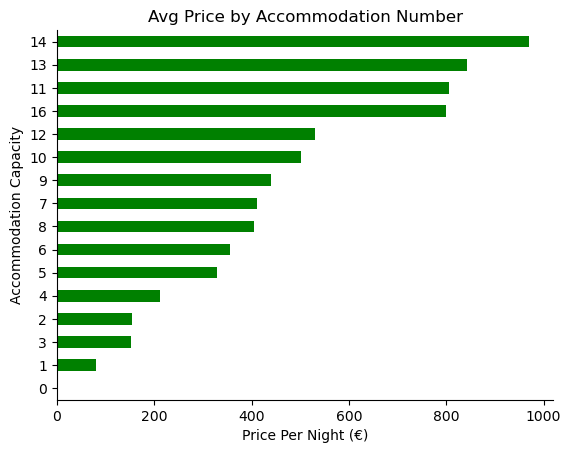

In [34]:
paris_listings_accommodates.plot(
    kind = "barh",
    color = "green",
    legend = None
)
sns.despine()
plt.xlabel("Price Per Night (€)")
plt.ylabel("Accommodation Capacity")
plt.title("Avg Price by Accommodation Number")
plt.show()

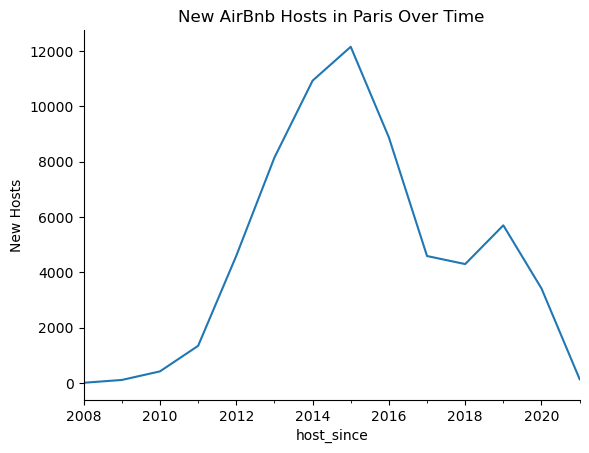

In [35]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel = "New Hosts",
    title = "New AirBnb Hosts in Paris Over Time"
)
sns.despine()

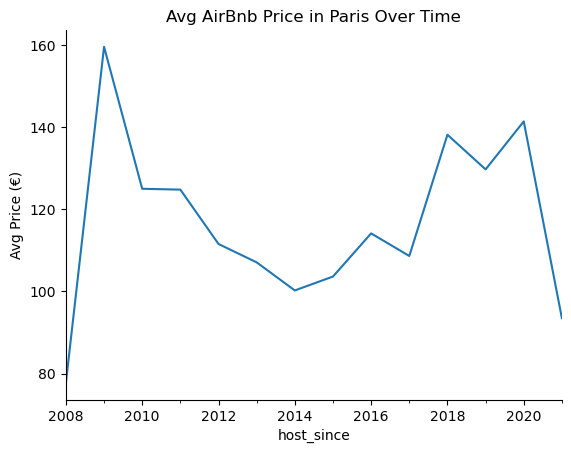

In [36]:
paris_listings_over_time["price"].plot(
    ylabel = "Avg Price (€)",
    title = "Avg AirBnb Price in Paris Over Time"
)
sns.despine()

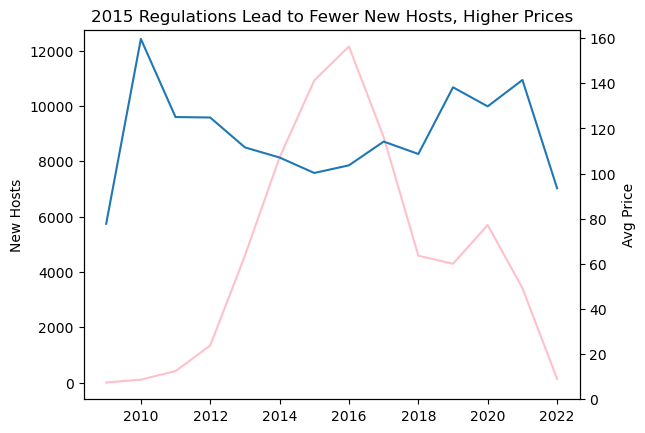

In [46]:
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label = "New Hosts",
    c = "pink",
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label = "Avg Price"
)
ax2.set_ylim(0)
ax2.set_ylabel("Avg Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")

plt.show()
